# Cluster Balls dataset

In this program the data from dataBalls.csv is visualized and analyzed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

The dataBalls.csv contains 2D data. We will load them from the file and visualize the data immediately (as a matrix and graphically).

In [2]:
data = pd.read_csv('../data/balls.csv', names=['x', 'y'])
data

,x,y
0,-0.202969,-1.520712
1,-0.545900,-2.165577
2,0.347952,-2.267513
3,-0.039389,-2.429920
4,-0.130040,-2.202356
...,...,...
145,-2.065639,1.612361
146,-1.993654,3.363436
147,-2.984946,3.036803
148,-2.189012,1.499390


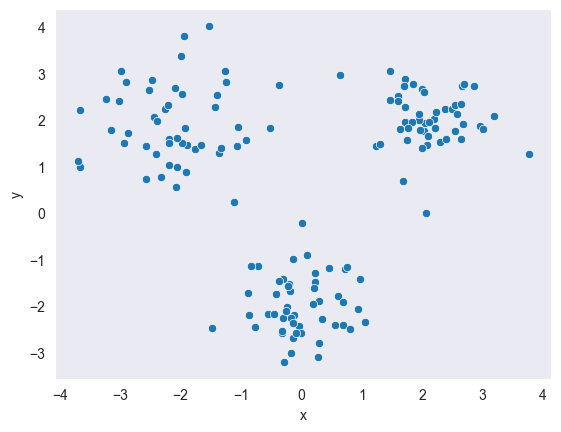

In [3]:
sns.scatterplot(data=data, x='x', y='y')
plt.grid()

Just by looking at the graph, we see that there are three different clusters. In some cases though, this is not that easy to see. That's why we use an elbow function to get the optimum number of clusters.

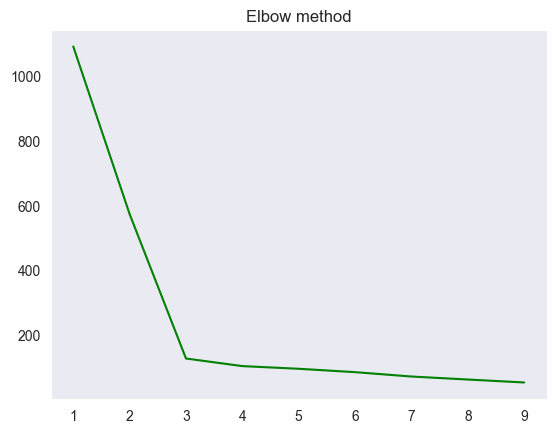

In [4]:
# store the inertias values for the visualization
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

sns.lineplot(
    x=range(1,10),
    y=inertias,
    color='green'
)
plt.rcParams.update({
    'figure.figsize': (10, 8),
    'figure.dpi': 100
})
plt.title('Elbow method')
plt.grid()
plt.show()

In [5]:
print('Inertia values:')
for i in range(1,10):
    print(f'{i} : {inertias[i - 1]}')

Inertia values:
1 : 1089.9004871363436
2 : 573.1758419046329
3 : 128.12111385275165
4 : 104.70957968896779
5 : 96.47588635156168
6 : 86.06251149597165
7 : 72.60916020736953
8 : 63.38432032876125
9 : 54.26017435938454


Now that we know, that the dataset consists of three different clusters (that's where the elbow is located) we're using KMeans to separate the datasets into three different clusters.

In [6]:
kmeans = KMeans(n_clusters=3).fit(data)
kmeans.cluster_centers_

array([[-0.01134736, -1.96891939],
       [ 2.1127095 ,  2.01361971],
       [-2.10671055,  1.92105575]])

Visualize the clusters with their centers

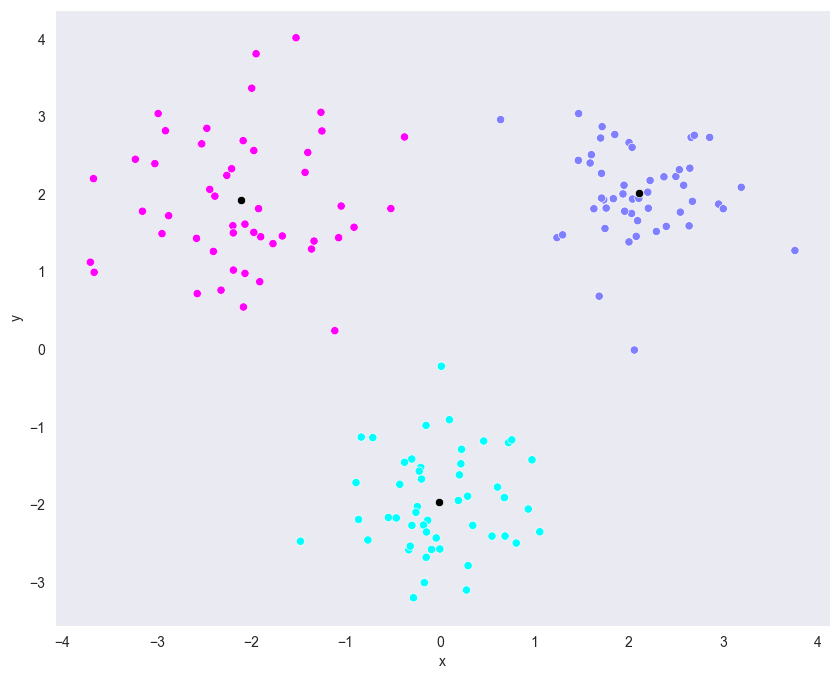

In [7]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    c=kmeans.labels_,
    cmap='cool'
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    c='black'
)
plt.grid()
plt.show()

Count the datapoints for each cluster.

In [8]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_

In [9]:
cluster_map_0 = cluster_map[cluster_map.cluster == 0]
cluster_map_1 = cluster_map[cluster_map.cluster == 1]
cluster_map_2 = cluster_map[cluster_map.cluster == 2]

In [10]:
print('Result of cluster map 0 count:')
print(cluster_map_0.count())
print('')
print('Result of cluster map 1 count:')
print(cluster_map_1.count())
print('')
print('Result of cluster map 2 count:')
print(cluster_map_2.count())

Result of cluster map 0 count:
data_index    50
cluster       50
dtype: int64

Result of cluster map 1 count:
data_index    50
cluster       50
dtype: int64

Result of cluster map 2 count:
data_index    50
cluster       50
dtype: int64


Let's try something... What if we get the number of clusters wrong? How will the result look like?

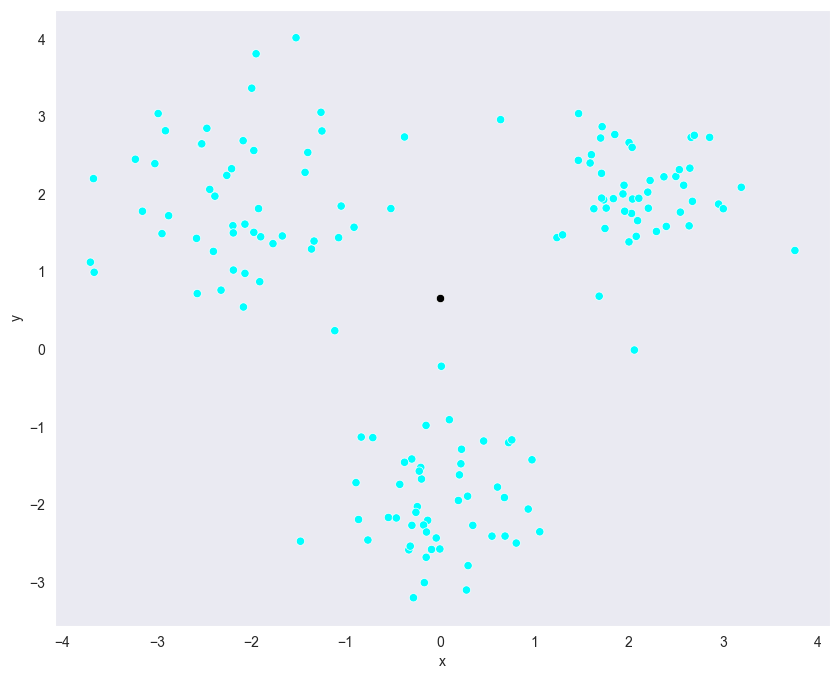

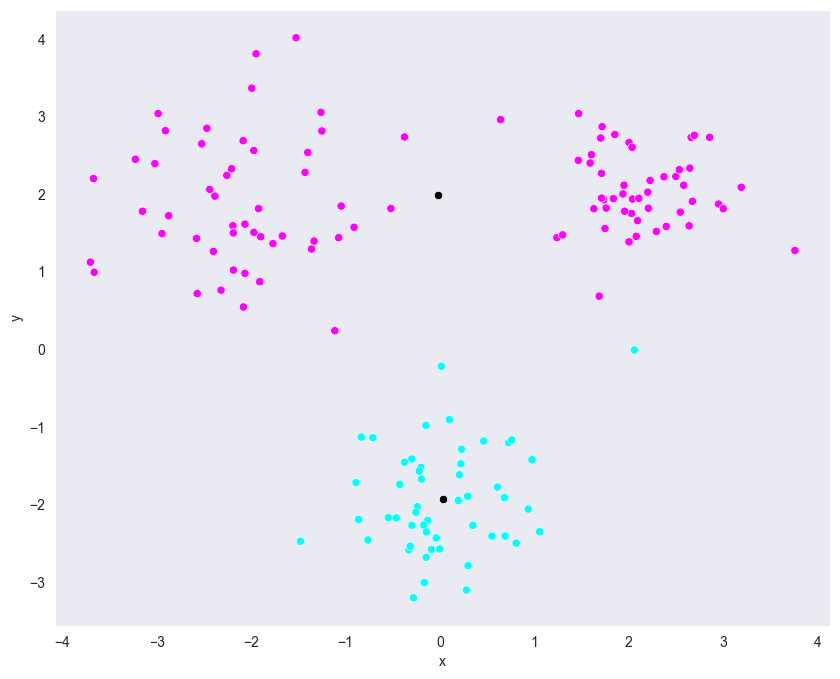

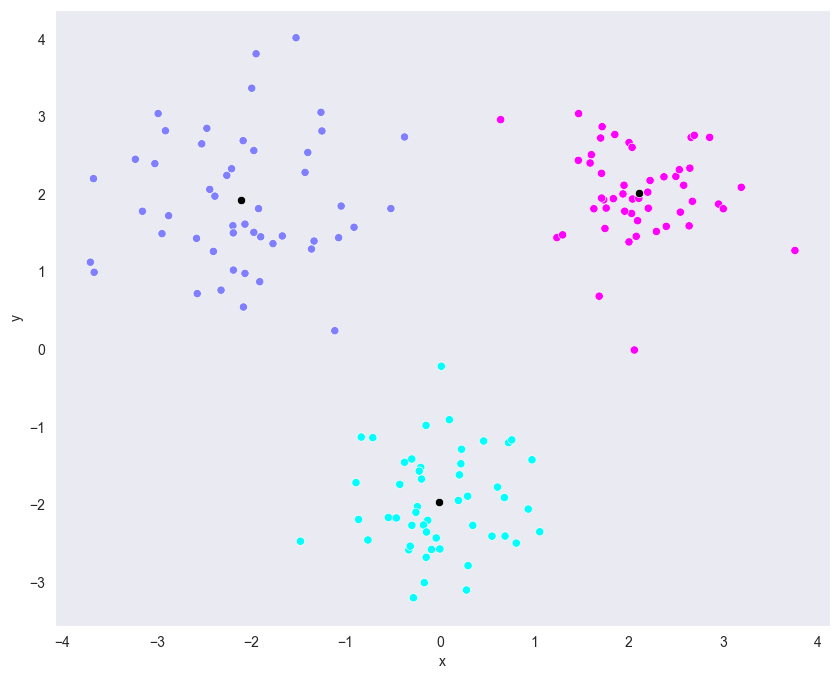

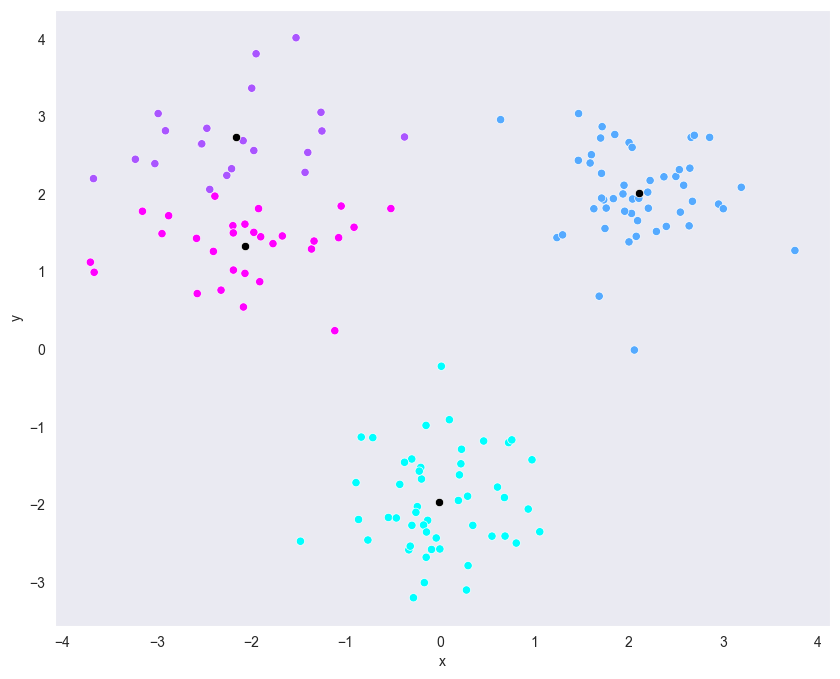

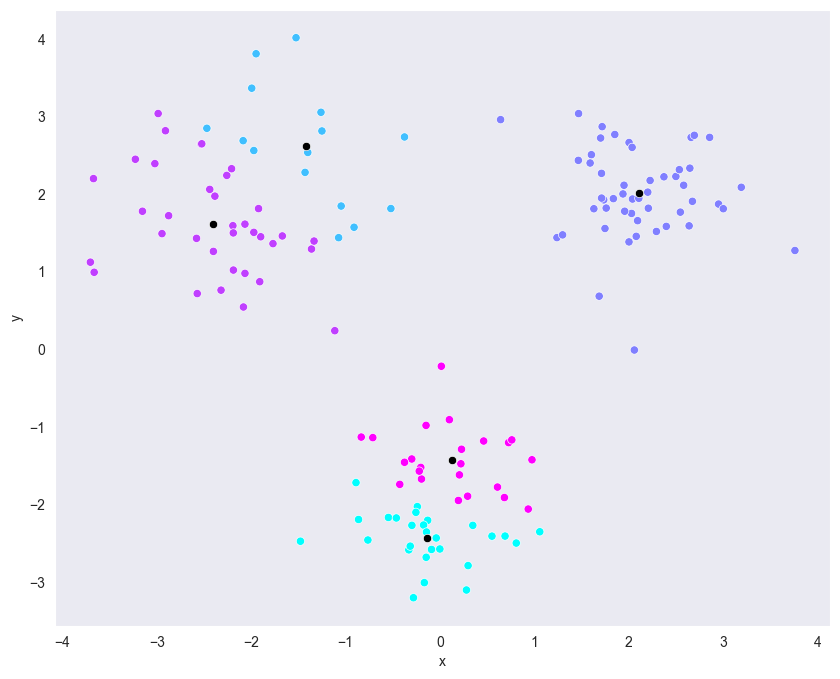

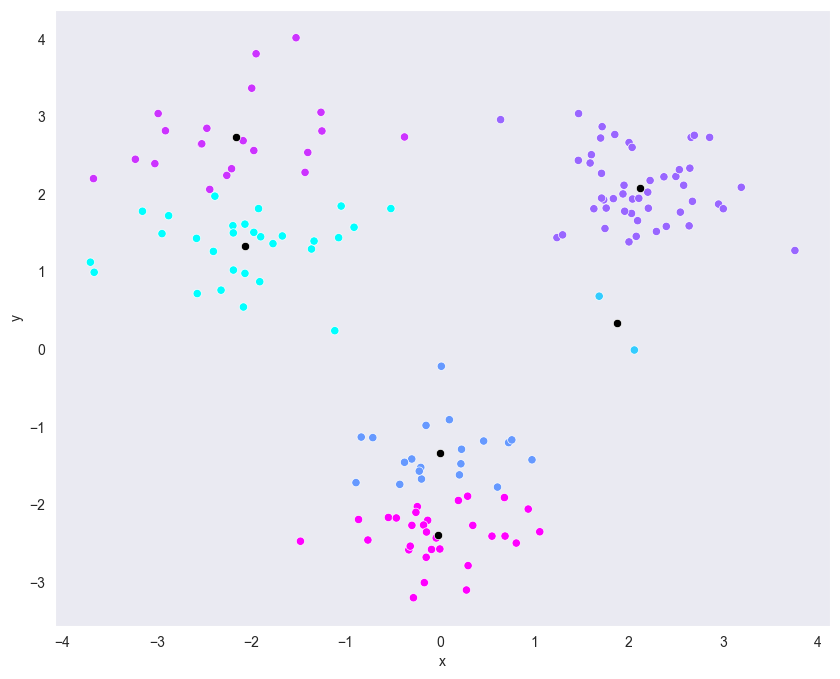

In [11]:
for i in range(1,7):
    kmeans = KMeans(n_clusters=i).fit(data)

    sns.scatterplot(
        data=data,
        x='x',
        y='y',
        c=kmeans.labels_,
        cmap='cool'
    )
    sns.scatterplot(
        x=kmeans.cluster_centers_[:, 0],
        y=kmeans.cluster_centers_[:, 1],
        c='black'
    )
    plt.grid()
    plt.show()